In [1]:
# 📦 1. Importar librerías principales
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 📁 2. Configurar paths automáticamente según entorno (Colab o local)
# Ruta base = carpeta ChurnNN
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar src al path para importar módulos
SRC_PATH = os.path.join(BASE_PATH, "src")
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

# 📁 3. Cargar y explorar el dataset
data_path = os.path.join(BASE_PATH, "data", "churn_dataset.csv")
df = pd.read_csv(data_path)
df.head()

,compras,llamadas_soporte,dias_inactivo,tiempo_suscrito,churn
0,4,0,27,1,1
1,1,2,25,13,1
2,3,1,18,6,1
3,3,2,23,17,1
4,2,3,18,12,1


In [2]:
# 🔍 4. Separar variables predictoras y variable objetivo
X = df.drop("churn", axis=1)
y = df["churn"]

# 🧼 5. Escalar los datos y dividir en train/test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [3]:
# 🧠 6. Cargar configuración y modelo
import yaml
from model import build_model
from utils import plot_metrics, show_confusion_matrix

# Cargar parámetros desde config.yaml
config_path = os.path.join(SRC_PATH, "config.yaml")
with open(config_path) as f:
    config = yaml.safe_load(f)

# Construir modelo
model = build_model(config)

C:\Users\USS\anaconda3\envs\tf310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [4]:
# 🚂 7. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=config['training']['epochs'],
    batch_size=config['training']['batch_size']
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3521 - loss: 0.7705 - val_accuracy: 0.3812 - val_loss: 0.7468
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4723 - loss: 0.7165 - val_accuracy: 0.5437 - val_loss: 0.6998
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6240 - loss: 0.6702 - val_accuracy: 0.6812 - val_loss: 0.6605
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7440 - loss: 0.6325 - val_accuracy: 0.7688 - val_loss: 0.6226
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7604 - loss: 0.6149 - val_accuracy: 0.8062 - val_loss: 0.5817
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7912 - loss: 0.5686 - val_accuracy: 0.8188 - val_loss: 0.5395
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8277 - loss: 0.5119 - val_accuracy: 0.8125 - val_loss: 0.4978
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8385 - loss: 0.4796 - val_accuracy: 0.8062 - v

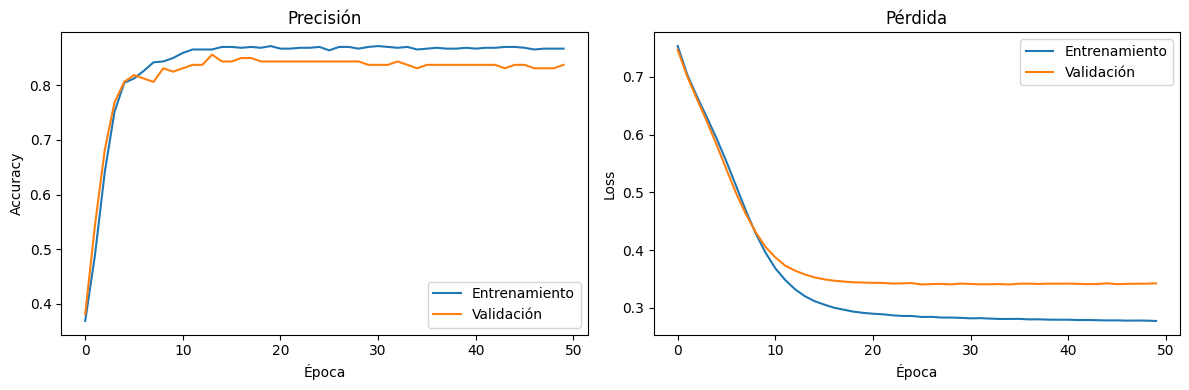

In [5]:
# 📉 8. Visualizar métricas de entrenamiento
plot_metrics(history)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 


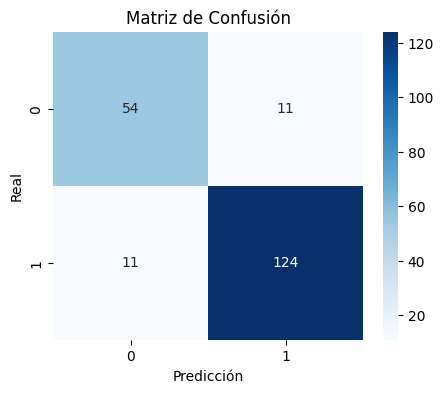

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        65
           1       0.92      0.92      0.92       135

    accuracy                           0.89       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.89      0.89       200



In [6]:
# 🧪 9. Evaluar el modelo en test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

show_confusion_matrix(y_test, y_pred_classes)